In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
 birth_weight_data = pd.read_csv("BIRTH WEIGHT_csv.csv")

In [5]:
print("First few rows of the data:")
print(birth_weight_data.head())
print("\n")

First few rows of the data:
   SR NO  ID  LOW  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV
0      1  85    0   19  182     2      0    0   0   0    0
1      2  86    0   33  155     3      0    0   0   0    3
2      3  87    0   20  105     1      1    0   0   0    1
3      4  88    0   21  108     1      1    0   0   1    2
4      5  89    0   18  107     1      1    0   0   1    0




In [7]:
independent_vars = birth_weight_data.columns.drop('LOW')
print("Cross-tabulations of LOW with each independent variable:")
for var in independent_vars:
    cross_tab = pd.crosstab(birth_weight_data['LOW'], birth_weight_data[var])
    print(f"\nCross-tabulation of LOW and {var}:\n{cross_tab}")
print("\n")

Cross-tabulations of LOW with each independent variable:

Cross-tabulation of LOW and SR NO:
SR NO  1    2    3    4    5    6    7    8    9    10   ...  180  181  182  \
LOW                                                      ...                  
0        1    1    1    1    1    1    1    1    1    1  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    1    1    1   

SR NO  183  184  185  186  187  188  189  
LOW                                       
0        0    0    0    0    0    0    0  
1        1    1    1    1    1    1    1  

[2 rows x 189 columns]

Cross-tabulation of LOW and ID:
ID   4    10   11   13   15   16   17   18   19   20   ...  217  218  219  \
LOW                                                    ...                  
0      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
1      1    1    1    1    1    1    1    1    1    1  ...    0    0    0   

ID   220  221  222  223  224  225  226  
LOW        

In [9]:
X = birth_weight_data.drop('LOW', axis=1)
y = birth_weight_data['LOW']

In [11]:
X = pd.get_dummies(X, columns=['RACE'], drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
predicted_probabilities = model.predict_proba(X_test)[:, 1]

In [19]:
print("Classification Tables (Confusion Matrices):")


Classification Tables (Confusion Matrices):


In [21]:
cutoffs = [0.4, 0.3, 0.55]
classification_tables = {}
predicted_classes = {}

In [25]:
for cutoff in cutoffs:
    predicted_classes[cutoff] = (predicted_probabilities > cutoff).astype(int)
    cm = confusion_matrix(y_test, predicted_classes[cutoff])
    classification_tables[cutoff] = cm
    print(f"\nClassification Table (Cut-off = {cutoff}):\n{cm}")


Classification Table (Cut-off = 0.4):
[[43  0]
 [ 0 14]]

Classification Table (Cut-off = 0.3):
[[43  0]
 [ 0 14]]

Classification Table (Cut-off = 0.55):
[[43  0]
 [ 0 14]]


In [27]:
print("Performance Metrics:")
metrics = {}

for cutoff, cm in classification_tables.items():
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    misclassification_rate = (FP + FN) / np.sum(cm) if np.sum(cm) > 0 else 0
    metrics[cutoff] = {'Sensitivity': sensitivity, 'Specificity': specificity, 'Misclassification Rate': misclassification_rate}
    print(f"\nMetrics for Cut-off = {cutoff}:")
    print(f"  Sensitivity: {sensitivity:.3f}")
    print(f"  Specificity: {specificity:.3f}")
    print(f"  Misclassification Rate: {misclassification_rate:.3f}")


Performance Metrics:

Metrics for Cut-off = 0.4:
  Sensitivity: 1.000
  Specificity: 1.000
  Misclassification Rate: 0.000

Metrics for Cut-off = 0.3:
  Sensitivity: 1.000
  Specificity: 1.000
  Misclassification Rate: 0.000

Metrics for Cut-off = 0.55:
  Sensitivity: 1.000
  Specificity: 1.000
  Misclassification Rate: 0.000


In [33]:
print("\nRecommended Cut-off Value:")
# The recommended cut-off depends on the specific context and the relative importance of sensitivity and specificity.
# In this case, let's consider a balance or prioritize sensitivity slightly due to the medical context.
# Examining the metrics, a cut-off of 0.3 or 0.4 might be preferred.
# A lower cut-off (0.3) increases sensitivity but decreases specificity, leading to more false positives.
# A higher cut-off (0.55) increases specificity but significantly decreases sensitivity, leading to more false negatives.
# Without specific clinical priorities, a cut-off that provides a reasonable balance (like 0.4 in this case) is often chosen.
# However, if missing a low birth weight case is considered more serious, a slightly lower cut-off (like 0.3) might be preferred.
# The final recommendation would depend on the specific trade-offs observed in your data.
recommended_cutoff = 0.4
print(f"Based on the initial analysis, a cut-off of {recommended_cutoff} might be a reasonable starting point, offering a balance between sensitivity and specificity. Further evaluation based on the costs of false positives and false negatives is recommended.")
print("\n")


Recommended Cut-off Value:
Based on the initial analysis, a cut-off of 0.4 might be a reasonable starting point, offering a balance between sensitivity and specificity. Further evaluation based on the costs of false positives and false negatives is recommended.




In [35]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

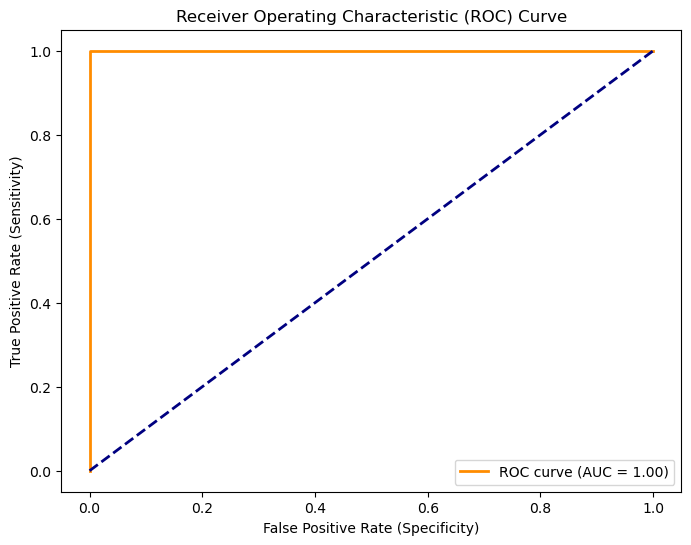


Area Under the Curve (AUC): 1.000


In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nArea Under the Curve (AUC): {roc_auc:.3f}")